
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

--- Missing Values ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesP

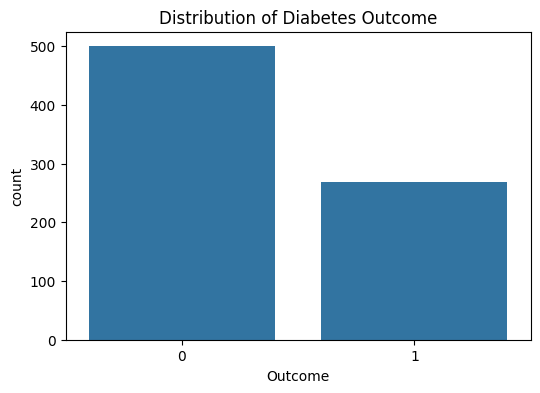

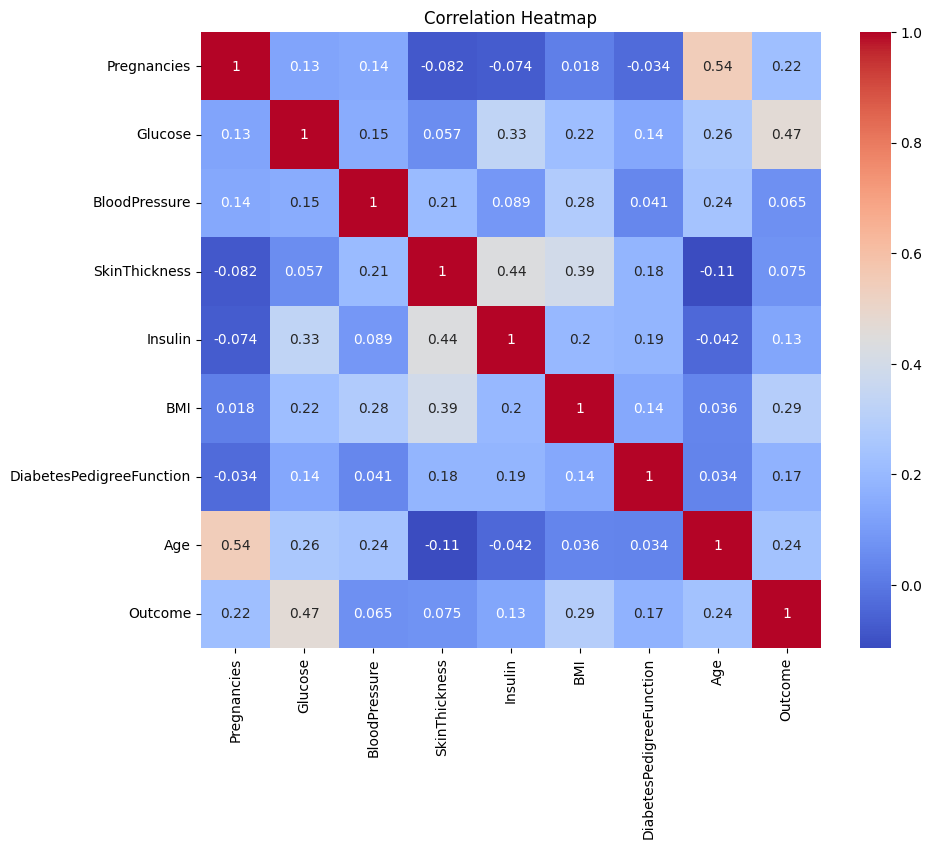

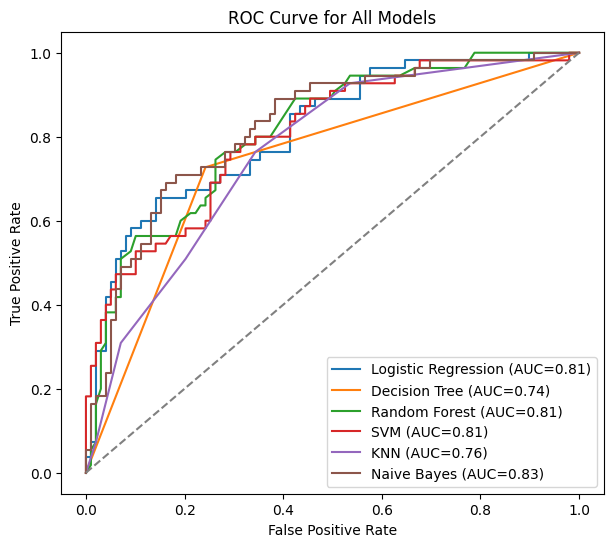


--- Model Comparison ---
                 Model  Accuracy   ROC AUC
5          Naive Bayes  0.766234  0.825344
0  Logistic Regression  0.753247  0.814692
2        Random Forest  0.720779  0.812489
3                  SVM  0.733766  0.805051
4                  KNN  0.694805  0.764096
1        Decision Tree  0.746753  0.742424


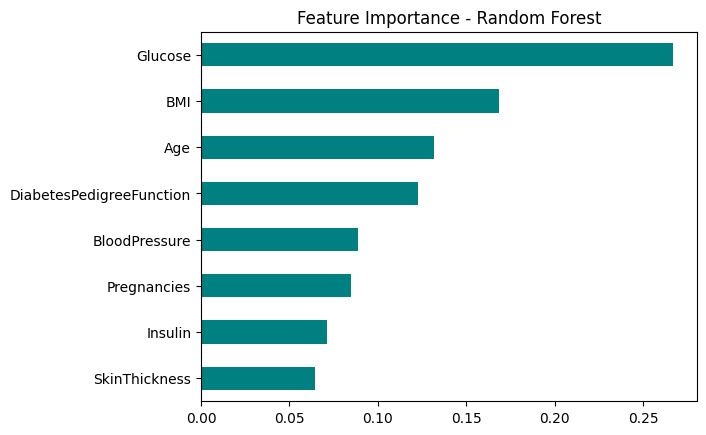


--- Confusion Matrix for Naive Bayes ---
[[79 20]
 [16 39]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


✅ Best Performing Model: Naive Bayes


In [1]:
# ==============================
# DIABETES PREDICTION PROJECT
# ==============================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 2: Load Dataset
df = pd.read_csv(r"D:\diabetes_project\diabetes.csv")

# Step 3: Basic Info
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Outcome Distribution ---")
print(df['Outcome'].value_counts())

# Step 4: Descriptive Statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Step 5: EDA (Exploratory Data Analysis)
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetes Outcome")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Split Data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Step 9: Evaluate Models
results = []
plt.figure(figsize=(7,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, roc])

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.2f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Step 10: Results Table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print("\n--- Model Comparison ---")
print(results_df.sort_values(by="ROC AUC", ascending=False))

# Step 11: Feature Importance (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=df.columns[:-1])
importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importance - Random Forest")
plt.show()

# Step 12: Confusion Matrix Example (Best Model)
best_model_name = results_df.sort_values(by="ROC AUC", ascending=False).iloc[0,0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"\n--- Confusion Matrix for {best_model_name} ---")
print(confusion_matrix(y_test, y_pred_best))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_best))

print(f"\n✅ Best Performing Model: {best_model_name}")
